Msc Data Science and Economics

Università degli Studi di Milano

Martina Viggiano (954603)

## *Perspectives on data sharing: a social media analysis*

# **2. Data Analysis Notebook**


Summary:

1.   IMPORTS
2.   EXPLORATORY ANALYSIS
    * 2.1 Time Series per Year
    * 2.2 Define separate dfs for hastags and terms
    * 2.3 Extract month of publication
        * 2.3.1 Month of publication - Pre-Post covid era
    * 2.4 Number of terms per tweet
    * 2.5 Composition of tweets
3. MOST FREQUENT TERMS
    * 3.1 Top Frequent Single Terms
        * 3.1.1 Top Frequent Single Term - Pre-Post Covid19 era
    * 3.2 Top Frequent Bi-grams
        * 3.2.1 Top Frequent Bi-grams - Pre-Post Covid19 era
    * 3.3 Top Frequent Tri-grams
        * 3.3.1 Top Frequent Tri-grams - Pre-Post Covid19 era
    * 3.4 Top Frequent terms by POS
4. HASHTAGS
5. SENTIMENT ANALYSIS
    * 5.1 Sentiment Analysis - Pre-Post Covid19 era
6. TOPIC MODELING
    * 6.1 Topic Modeling - Pre-Post Covid19 era




---

## 1. **IMPORTS**


We connect the notebook to our personal Google Drive folder: it will be used to store and load data.

In [ ]:
# Connect Drive
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import sys
sys.path.append('/content/drive/My Drive/Università/Thesis/')

We import and download libraries and packages.

In [ ]:
# install unidecode
!pip install -U spacy unidecode

In [ ]:
# install spacy and download english language
!python -m spacy download en_core_web_sm

In [ ]:
# install plotly
!pip install plotly

In [ ]:
# install gensim
!pip install gensim==3.8

In [ ]:
# Import libraries
import pickle
import pandas as pd
import numpy as np
from functools import reduce
import datetime
import re
from unidecode import unidecode
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
import spacy
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
tqdm.pandas()
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
from collections import defaultdict
from google.colab import files
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from pprint import pprint
import gensim
import gensim.corpora as corpora

Load back data

In [ ]:
with open("/content/drive/MyDrive/Università/Thesis/data_merge_text_clean_nlp.pkl", "rb") as f:
    data_merge_text_clean_nlp = pickle.load(f)

In [ ]:
data_merge = data_merge_text_clean_nlp

In [ ]:
data_merge.shape[0]

224784

Pre and post Covid19 era data

In [ ]:
with open("/content/drive/MyDrive/Università/Thesis/data_pre_covid.pkl", "rb") as f:
    data_pre_covid = pickle.load(f)
with open("/content/drive/MyDrive/Università/Thesis/data_post_covid.pkl", "rb") as f:
    data_post_covid = pickle.load(f)

Number of tweets per year

In [ ]:
with open("/content/drive/MyDrive/Università/Thesis/df_count_per_year.pkl", "rb") as f:
    df_count_per_year = pickle.load(f)

Conversations

In [ ]:
with open("/content/drive/MyDrive/Università/Thesis/data_merge_conversations.pkl", "rb") as f:
    data_merge_conversations = pickle.load(f)

Time series

In [ ]:
with open("/content/drive/MyDrive/Università/Thesis/df_time_count_hashtags.pkl", "rb") as f:
    df_time_count_hashtags = pickle.load(f)
with open("/content/drive/MyDrive/Università/Thesis/df_time_count_oneterm.pkl", "rb") as f:
    df_time_count_oneterm = pickle.load(f)
with open("/content/drive/MyDrive/Università/Thesis/df_time_count_twoterms.pkl", "rb") as f:
    df_time_count_twoterms = pickle.load(f)

In [ ]:
with open("/content/drive/MyDrive/Università/Thesis/df_time_count_hashtags_relative.pkl", "rb") as f:
    df_time_count_hashtags_relative = pickle.load(f)
with open("/content/drive/MyDrive/Università/Thesis/df_time_count_oneterm_relative.pkl", "rb") as f:
    df_time_count_oneterm_relative = pickle.load(f)
with open("/content/drive/MyDrive/Università/Thesis/df_time_count_twoterms_relative.pkl", "rb") as f:
    df_time_count_twoterms_relative = pickle.load(f)

---

## 2. **EXPLORATORY ANALYSIS**


### 2.1 Time Series per Year 


We are interested in building a timeline of tweets containing given keywords and hashtags.

Fist, apart from data we collected in *Thesis_import* notebook respecting given constraints, we are also interested in knowing the frequencies of publication without taking into account any contraints and filters. To do so, we extract frequencies of publication for each hashtag and keyterm, without using any filter, such as language or elements in the tweets.

The only constraint was to contain the terms and hashtags: *opendata, openresearch, datasharing, openscience*.

In [ ]:
df_count_per_year

,year,count
0,2007,75
1,2008,533
2,2009,4356
3,2010,17046
4,2011,27150
5,2012,36876
6,2013,45702
7,2014,50987
8,2015,48626
9,2016,43498


In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_count_per_year['year'], y=df_count_per_year['count'],
                    line = dict(color='royalblue')))

fig.update_layout(title='Number of tweets filtered extracted by keywords from 2007 to 2021',
                   xaxis=dict(title='Years', tickmode='linear'),
                   yaxis_title='Number of tweets')

fig.show()

The numbers diplayed are obtained by summing the amount of tweets containing the hashtag/term in each year (2007-2021).

In [ ]:
df_time_count_hashtags

,year,#opendata,#openscience,#openresearch,#datasharing
0,2007,0,0,0,0
1,2008,11,4,1,11
2,2009,5103,138,29,9
3,2010,62224,852,168,321
4,2011,178048,3962,181,276
5,2012,297456,18464,528,638
6,2013,338714,30332,1199,1225
7,2014,403822,55328,2468,9473
8,2015,485843,69912,2395,7140
9,2016,517164,102601,2595,14860


In [ ]:
fig = go.Figure()

fig = make_subplots(rows=2, cols=1, subplot_titles=("Absolute Frequency", "Relative Frequency"), vertical_spacing=0.15)

fig.add_trace(go.Scatter(x=df_time_count_hashtags['year'], y=df_time_count_hashtags['#opendata'],
                   name='#opendata', line = dict(color='royalblue')), row=1, col=1)
fig.add_trace(go.Scatter(x=df_time_count_hashtags['year'], y=df_time_count_hashtags['#openscience'],
                   name='#openscience', line = dict(color='firebrick')), row=1, col=1)
fig.add_trace(go.Scatter(x=df_time_count_hashtags['year'], y=df_time_count_hashtags['#openresearch'],
                   name='#openresearch', line = dict(color='gold')), row=1, col=1)
fig.add_trace(go.Scatter(x=df_time_count_hashtags['year'], y=df_time_count_hashtags['#datasharing'],
                   name='#datasharing', line = dict(color='forestgreen')), row=1, col=1)

fig.add_trace(go.Scatter(x=df_time_count_oneterm['year'], y=df_time_count_oneterm['opendata'],
                   name='opendata', line = dict(color='royalblue', dash='dash')), row=1, col=1)
fig.add_trace(go.Scatter(x=df_time_count_oneterm['year'], y=df_time_count_oneterm['openscience'],
                   name='openscience', line = dict(color='firebrick', dash='dash')), row=1, col=1)
fig.add_trace(go.Scatter(x=df_time_count_oneterm['year'], y=df_time_count_oneterm['openresearch'],
                   name='openresearch', line = dict(color='gold', dash='dash')), row=1, col=1)
fig.add_trace(go.Scatter(x=df_time_count_oneterm['year'], y=df_time_count_oneterm['datasharing'],
                   name='datasharing', line = dict(color='forestgreen', dash='dash')), row=1, col=1)

fig.add_trace(go.Scatter(x=df_time_count_hashtags_relative['year'], y=df_time_count_hashtags_relative['#opendata'],
                   name='#opendata', line = dict(color='royalblue'), legendgroup='group1', showlegend=False), row=2, col=1)
fig.add_trace(go.Scatter(x=df_time_count_hashtags_relative['year'], y=df_time_count_hashtags_relative['#openscience'],
                   name='#openscience', line = dict(color='firebrick'), legendgroup='group1', showlegend=False), row=2, col=1)
fig.add_trace(go.Scatter(x=df_time_count_hashtags_relative['year'], y=df_time_count_hashtags_relative['#openresearch'],
                   name='#openresearch', line = dict(color='gold'), legendgroup='group1', showlegend=False), row=2, col=1)
fig.add_trace(go.Scatter(x=df_time_count_hashtags_relative['year'], y=df_time_count_hashtags_relative['#datasharing'],
                   name='#datasharing', line = dict(color='forestgreen'), legendgroup='group1', showlegend=False), row=2, col=1)

fig.add_trace(go.Scatter(x=df_time_count_oneterm_relative['year'], y=df_time_count_oneterm_relative['opendata'],
                   name='opendata', line = dict(color='royalblue', dash='dash'), legendgroup='group1', showlegend=False), row=2, col=1)
fig.add_trace(go.Scatter(x=df_time_count_oneterm_relative['year'], y=df_time_count_oneterm_relative['openscience'],
                   name='openscience', line = dict(color='firebrick', dash='dash'), legendgroup='group1', showlegend=False), row=2, col=1)
fig.add_trace(go.Scatter(x=df_time_count_oneterm_relative['year'], y=df_time_count_oneterm_relative['openresearch'],
                   name='openresearch', line = dict(color='gold', dash='dash'), legendgroup='group1', showlegend=False), row=2, col=1)
fig.add_trace(go.Scatter(x=df_time_count_oneterm_relative['year'], y=df_time_count_oneterm_relative['datasharing'],
                   name='datasharing', line = dict(color='forestgreen', dash='dash'), legendgroup='group1', showlegend=False), row=2, col=1)

fig.update_xaxes(title_text="Year", tickmode='linear', row=1, col=1)
fig.update_xaxes(title_text="Year", tickmode='linear', row=2, col=1)

fig.update_yaxes(title_text="N", row=1, col=1)
fig.update_yaxes(title_text="%", row=2, col=1)

fig.update_layout(title_text="Number of tweets posted from 2007 to 2021 per keyword and hashtag", height=800)


fig.show()

### 2.2 Define separate dfs for hastags and terms



We split data based on the presence of given keywords and hashtags. In particular, we create:

*   df_h_opendata : having #opendata
*   df_opendata : having "opendata" or "open data"
*   df_h_datasharing: having #datasharing
*   df_datasharing: having "datasharing" or "data sharing"
*   df_h_openscience: having #openscience
*   df_openscience: having "openscience" or "open science"
*   df_h_openresearch: having #openresearch
*   df_openresearch: having "openresearch" or "open research"

In [ ]:
df_h_opendata = data_merge[data_merge['text'].str.contains('#opendata', case=False)]

In [ ]:
str_opendata = [' opendata', 'open data']
df_opendata = data_merge[data_merge['text'].str.contains('|'.join(str_opendata), case=False)]

In [ ]:
df_h_datasharing = data_merge[data_merge['text'].str.contains('#datasharing', case=False)]

In [ ]:
str_datasharing = [' datasharing', 'data sharing']
df_datasharing = data_merge[data_merge['text'].str.contains('|'.join(str_datasharing), case=False)]

In [ ]:
df_h_openscience = data_merge[data_merge['text'].str.contains('#openscience', case=False)]

In [ ]:
str_openscience = [' openscience', 'open science']
df_openscience = data_merge[data_merge['text'].str.contains('|'.join(str_openscience), case=False)]

In [ ]:
df_h_openresearch = data_merge[data_merge['text'].str.contains('#openresearch', case=False)]

In [ ]:
str_openresearch = [' openresearch', 'open research']
df_openresearch = data_merge[data_merge['text'].str.contains('|'.join(str_openresearch), case=False)]

In [ ]:
def extract_year(df):
    df_year = df.year.value_counts().reset_index()
    df_year.columns = ['year', 'count']
    df_year['rel_frequency'] = ((df_year['count'] /  df_year['count'].sum()) * 100).round(2)
    df_year = df_year.sort_values('year').reset_index(drop=True)
    return df_year

In [ ]:
df_year_h_opendata_filter = extract_year(df_h_opendata)
df_year_opendata_filter = extract_year(df_opendata)
df_year_h_openscience_filter = extract_year(df_h_openscience)
df_year_openscience_filter = extract_year(df_openscience)
df_year_h_datasharing_filter = extract_year(df_h_datasharing)
df_year_datasharing_filter = extract_year(df_datasharing)
df_year_h_openresearch_filter = extract_year(df_h_openresearch)
df_year_openresearch_filter = extract_year(df_openresearch)

In [ ]:
fig = go.Figure()

fig = make_subplots(rows=2, cols=1, subplot_titles=("Absolute Frequency", "Relative Frequency"), vertical_spacing=0.15) #, row_heights=[2,2]

fig.add_trace(go.Scatter(x=df_year_h_opendata_filter['year'], y=df_year_h_opendata_filter['count'],
                   name='#opendata', line = dict(color='steelblue')), row=1, col=1)
fig.add_trace(go.Scatter(x=df_year_h_openscience_filter['year'], y=df_year_h_openscience_filter['count'],
                   name='#openscience', line = dict(color='indianred')), row=1, col=1)
fig.add_trace(go.Scatter(x=df_year_h_datasharing_filter['year'], y=df_year_h_datasharing_filter['count'],
                   name='#openresearch', line = dict(color='gold')), row=1, col=1)
fig.add_trace(go.Scatter(x=df_year_h_openresearch_filter['year'], y=df_year_h_openresearch_filter['count'],
                   name='#datasharing', line = dict(color='forestgreen')), row=1, col=1)

fig.add_trace(go.Scatter(x=df_year_opendata_filter['year'], y=df_year_opendata_filter['count'],
                   name='opendata', line = dict(color='steelblue', dash='dash')), row=1, col=1)
fig.add_trace(go.Scatter(x=df_year_openscience_filter['year'], y=df_year_openscience_filter['count'],
                   name='openscience', line = dict(color='firebrick', dash='dash')), row=1, col=1)
fig.add_trace(go.Scatter(x=df_year_datasharing_filter['year'], y=df_year_datasharing_filter['count'],
                   name='openresearch', line = dict(color='gold', dash='dash')), row=1, col=1)
fig.add_trace(go.Scatter(x=df_year_openresearch_filter['year'], y=df_year_openresearch_filter['count'],
                   name='datasharing', line = dict(color='forestgreen', dash='dash')), row=1, col=1)

fig.add_trace(go.Scatter(x=df_year_h_opendata_filter['year'], y=df_year_h_opendata_filter['rel_frequency'],
                   name='#opendata', line = dict(color='steelblue'), legendgroup='group1', showlegend=False), row=2, col=1)
fig.add_trace(go.Scatter(x=df_year_h_openscience_filter['year'], y=df_year_h_openscience_filter['rel_frequency'],
                   name='#openscience', line = dict(color='firebrick'), legendgroup='group1', showlegend=False), row=2, col=1)
fig.add_trace(go.Scatter(x=df_year_h_datasharing_filter['year'], y=df_year_h_datasharing_filter['rel_frequency'],
                   name='#openresearch', line = dict(color='gold'), legendgroup='group1', showlegend=False), row=2, col=1)
fig.add_trace(go.Scatter(x=df_year_h_openresearch_filter['year'], y=df_year_h_openresearch_filter['rel_frequency'],
                   name='#datasharing', line = dict(color='forestgreen'), legendgroup='group1', showlegend=False), row=2, col=1)

fig.add_trace(go.Scatter(x=df_year_opendata_filter['year'], y=df_year_opendata_filter['rel_frequency'],
                   name='opendata', line = dict(color='royalblue', dash='dash'), legendgroup='group1', showlegend=False), row=2, col=1)
fig.add_trace(go.Scatter(x=df_year_openscience_filter['year'], y=df_year_openscience_filter['rel_frequency'],
                   name='openscience', line = dict(color='firebrick', dash='dash'), legendgroup='group1', showlegend=False), row=2, col=1)
fig.add_trace(go.Scatter(x=df_year_datasharing_filter['year'], y=df_year_datasharing_filter['rel_frequency'],
                   name='openresearch', line = dict(color='gold', dash='dash'), legendgroup='group1', showlegend=False), row=2, col=1)
fig.add_trace(go.Scatter(x=df_year_openresearch_filter['year'], y=df_year_openresearch_filter['rel_frequency'],
                   name='datasharing', line = dict(color='forestgreen', dash='dash'), legendgroup='group1', showlegend=False), row=2, col=1)

fig.update_xaxes(title_text="Years", tickmode='linear', row=1, col=1)
fig.update_xaxes(title_text="Years", tickmode='linear', row=2, col=1)

fig.update_yaxes(title_text="N", row=1, col=1)
fig.update_yaxes(title_text="%", row=2, col=1)

fig.update_layout(title_text="Frequency of tweets retrieved from 2007 to 2021 per keyword and hashtag", height=800)

fig.show()

### 2.3 Extract month of publication

In [ ]:
data_merge['month'] = data_merge['date'].dt.month

In [ ]:
def extract_month(df):
    df['month'] = df['date'].dt.month
    df_month = df.month.value_counts().reset_index()
    df_month.columns = ['month', 'count']
    df_month['rel_frequency'] = ((df_month['count'] /  df_month['count'].sum()) * 100).round(2)
    df_month = df_month.sort_values('month').reset_index(drop=True)
    df_month['month'] = df_month['month'].replace([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    return df_month

In [ ]:
df_month_h_opendata = extract_month(df_h_opendata)
df_month_opendata = extract_month(df_opendata)
df_month_h_openscience = extract_month(df_h_openscience)
df_month_openscience = extract_month(df_openscience)
df_month_h_datasharing = extract_month(df_h_datasharing)
df_month_datasharing = extract_month(df_datasharing)
df_month_h_openresearch = extract_month(df_h_openresearch)
df_month_openresearch = extract_month(df_openresearch)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df_month_opendata

,month,count,rel_frequency
0,Jan,4401,6.59
1,Feb,5918,8.86
2,Mar,6548,9.81
3,Apr,5857,8.77
4,May,6152,9.21
5,June,5836,8.74
6,July,5068,7.59
7,Aug,3719,5.57
8,Sep,5926,8.88
9,Oct,6695,10.03


In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=df_month_h_opendata['month'], y=df_month_h_opendata['rel_frequency'],
                   name='#opendata', line = dict(color='royalblue')))
fig.add_trace(go.Scatter(x=df_month_h_openscience['month'], y=df_month_h_openscience['rel_frequency'],
                   name='#openscience', line = dict(color='firebrick')))
fig.add_trace(go.Scatter(x=df_month_h_openresearch['month'], y=df_month_h_openresearch['rel_frequency'],
                   name='#openresearch', line = dict(color='gold')))
fig.add_trace(go.Scatter(x=df_month_h_datasharing['month'], y=df_month_h_datasharing['rel_frequency'],
                   name='#datasharing', line = dict(color='forestgreen')))

fig.add_trace(go.Scatter(x=df_month_opendata['month'], y=df_month_opendata['rel_frequency'],
                   name='opendata', line = dict(color='royalblue', dash='dash')))
fig.add_trace(go.Scatter(x=df_month_openscience['month'], y=df_month_openscience['rel_frequency'],
                   name='openscience', line = dict(color='firebrick', dash='dash')))
fig.add_trace(go.Scatter(x=df_month_openresearch['month'], y=df_month_openresearch['rel_frequency'],
                   name='openresearch', line = dict(color='gold', dash='dash')))
fig.add_trace(go.Scatter(x=df_month_datasharing['month'], y=df_month_datasharing['rel_frequency'],
                   name='datasharing', line = dict(color='forestgreen', dash='dash')))

fig.update_layout(title='Frequency of tweets within months per keyword and hashtag',
                   xaxis=dict(title='Months', tickmode='linear'),
                   yaxis_title='Relative Frequency')

fig.show()

### 2.3.1 Month of publication - Pre-Post covid era

Then, we visualize the amount of tweets published in each month. 

In [ ]:
df_month_pre = extract_month(data_pre_covid)
df_month_post = extract_month(data_post_covid)

In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=df_month_pre['month'], y=df_month_pre['rel_frequency'],
                   name='Pre-Covid19 era', line = dict(color='royalblue')))
fig.add_trace(go.Scatter(x=df_month_post['month'], y=df_month_post['rel_frequency'],
                   name='Post-Covid19 era', line = dict(color='firebrick')))

fig.update_layout(title='Frequency of tweets within months between pre and post Covid19 era',
                   xaxis=dict(title='Months', tickmode='linear'),
                   yaxis_title='Relative Frequency')

fig.show()

### 2.4 Number of terms per tweet

In [ ]:
n_terms_raw = data_merge['text'].apply(lambda x: len(x.split()))
n_terms_clean = data_merge['text_clean'].apply(lambda x: len(x.split()))

fig = go.Figure()
fig.add_trace(go.Histogram(x=n_terms_raw, name='original tweets'))
fig.add_trace(go.Histogram(x=n_terms_clean, name='clean tweets'))

fig.update_layout(barmode='overlay') # Overlay both histograms

fig.update_traces(opacity=0.75) # Reduce opacity to see both histograms

fig.update_xaxes(range=[0, 60])

fig.update_layout(title='Number of tokens per tweet',
                   xaxis=dict(title='Number of tokens'),
                   yaxis_title='Tweet Frequency')

fig.show()

In [ ]:
print('Average number of terms per tweet before cleaning :', n_terms_raw.mean())
print('Average number of terms per tweet after cleaning :', n_terms_clean.mean())

Average number of terms per tweet before cleaning : 21.851706527154956
Average number of terms per tweet after cleaning : 9.535038081002206


### 2.5 Composition of tweets

We look for propotions between tweets with hashtags and tweets with keywords.

In [ ]:
both_opendata = len(data_merge[(data_merge['text_clean'].str.contains('opendata')) & (data_merge['hashtags'].str.contains('opendata'))])

In [ ]:
single_opendata = len(data_merge[(data_merge['text_clean'].str.contains('opendata')) | (data_merge['hashtags'].str.contains('opendata'))])

In [ ]:
(both_opendata/single_opendata)*100

2.3733245506352483

In [ ]:
both_openscience = len(data_merge[(data_merge['text_clean'].str.contains('openscience')) & (data_merge['hashtags'].str.contains('openscience'))])

In [ ]:
single_openscience = len(data_merge[(data_merge['text_clean'].str.contains('openscience')) | (data_merge['hashtags'].str.contains('openscience'))])

In [ ]:
(both_openscience/single_openscience)*100

1.635937957272461

In [ ]:
both_openresearch = len(data_merge[(data_merge['text_clean'].str.contains('openresearch')) & (data_merge['hashtags'].str.contains('openresearch'))])

In [ ]:
single_openresearch = len(data_merge[(data_merge['text_clean'].str.contains('openresearch')) | (data_merge['hashtags'].str.contains('openresearch'))])

In [ ]:
(both_openresearch/single_openresearch)*100

1.1079104808331486

In [ ]:
both_datasharing = len(data_merge[(data_merge['text_clean'].str.contains('datasharing')) & (data_merge['hashtags'].str.contains('datasharing'))])

In [ ]:
single_datasharing = len(data_merge[(data_merge['text_clean'].str.contains('datasharing')) | (data_merge['hashtags'].str.contains('datasharing'))])

In [ ]:
(both_datasharing/single_datasharing)*100

0.3472345250327747

---

## 3. **MOST FREQUENT TERMS**

### 3.1 Top Frequent Single Terms

In [ ]:
def get_top_n_words_(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    c = pd.DataFrame.from_dict({word: freq/len(corpus) for word, freq in words_freq[:n]}, orient='index').reset_index()
    c = c.rename(columns={'index': 'words', 0: 'freq'})
    return c

In [ ]:
cmw = get_top_n_words_(data_merge['text_clean'], 50)
cmw.columns = ["words", "freq"]
cmw_notop = get_top_n_words_(data_merge['text_clean_notop'], 50)
cmw_notop.columns = ["words", "freq"]
cmw_21 = get_top_n_words_(data_merge['text_clean_notop'][data_merge['date'].dt.year==2021], 50)
cmw_21.columns = ["words", "freq"]
cmw_20 = get_top_n_words_(data_merge['text_clean_notop'][data_merge['date'].dt.year==2020], 50)
cmw_20.columns = ["words", "freq"]
cmw_19 = get_top_n_words_(data_merge['text_clean_notop'][data_merge['date'].dt.year==2019], 50)
cmw_19.columns = ["words", "freq"]
cmw_18 = get_top_n_words_(data_merge['text_clean_notop'][data_merge['date'].dt.year==2018], 50)
cmw_18.columns = ["words", "freq"]
cmw_17 = get_top_n_words_(data_merge['text_clean_notop'][data_merge['date'].dt.year==2017], 50)
cmw_17.columns = ["words", "freq"]
cmw_16 = get_top_n_words_(data_merge['text_clean_notop'][data_merge['date'].dt.year==2016], 50)
cmw_16.columns = ["words", "freq"]
cmw_15 = get_top_n_words_(data_merge['text_clean_notop'][data_merge['date'].dt.year==2015], 50)
cmw_15.columns = ["words", "freq"]
cmw_14 = get_top_n_words_(data_merge['text_clean_notop'][data_merge['date'].dt.year==2014], 50)
cmw_14.columns = ["words", "freq"]
cmw_13 = get_top_n_words_(data_merge['text_clean_notop'][data_merge['date'].dt.year==2013], 50)
cmw_13.columns = ["words", "freq"]
cmw_12 = get_top_n_words_(data_merge['text_clean_notop'][data_merge['date'].dt.year==2012], 50)
cmw_12.columns = ["words", "freq"]
cmw_11 = get_top_n_words_(data_merge['text_clean_notop'][data_merge['date'].dt.year==2011], 50)
cmw_11.columns = ["words", "freq"]
cmw_10 = get_top_n_words_(data_merge['text_clean_notop'][data_merge['date'].dt.year==2010], 50)
cmw_10.columns = ["words", "freq"]
cmw_09 = get_top_n_words_(data_merge['text_clean_notop'][data_merge['date'].dt.year==2009], 50)
cmw_09.columns = ["words", "freq"]
cmw_08 = get_top_n_words_(data_merge['text_clean_notop'][data_merge['date'].dt.year==2008], 50)
cmw_08.columns = ["words", "freq"]
cmw_07 = get_top_n_words_(data_merge['text_clean_notop'][data_merge['date'].dt.year==2007], 50)
cmw_07.columns = ["words", "freq"]

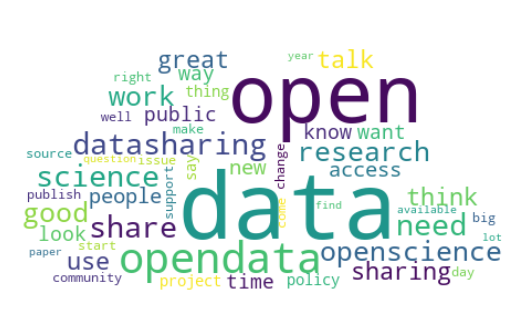

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Most Frequent Terms - Entire set

path_cloud = "/content/drive/MyDrive/Università/Thesis/images/cloud.png"
cloud = np.array(Image.open(path_cloud))

text = ' '.join(cmw['words'].values)

wordcloud = WordCloud(background_color="white", mask=cloud, width=800, height=400).generate(text)

fig = plt.figure(figsize=(7,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()
fig.savefig('word_cloud.png')
files.download('word_cloud.png')

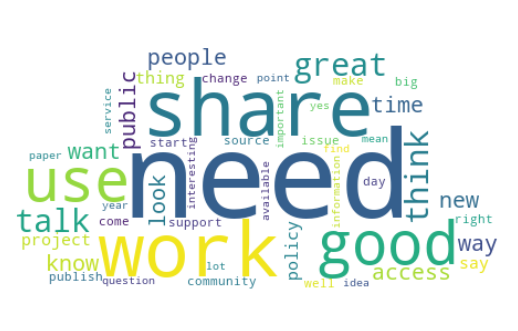

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Most Frequent Terms - Without top terms

text_notop = ' '.join(cmw_notop['words'].values)

wordcloud = WordCloud(background_color="white", mask=cloud, width=800, height=400).generate(text_notop)

fig = plt.figure(figsize=(7,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()
fig.savefig('word_cloud.png')
files.download('word_cloud.png')

In [ ]:
first_10 = pd.concat([cmw[:10], cmw_notop[:10]], axis=1, names=["group_key"])
first_10.columns = ['words_tot', 'freq_tot', 'words_notop', 'freq_notop']
first_10

,words_tot,freq_tot,words_notop,freq_notop
0,data,0.387919,need,0.071535
1,open,0.242944,share,0.066860
2,opendata,0.211745,work,0.058065
3,datasharing,0.117104,good,0.056156
4,science,0.073359,like,0.046600
5,need,0.071535,use,0.044750
6,share,0.066860,great,0.042966
7,openscience,0.064764,talk,0.042863
8,research,0.063977,think,0.042387
9,work,0.058065,people,0.042187


In [ ]:
top_terms_years = pd.concat([cmw_07[:10], cmw_08[:10], cmw_09[:10], cmw_10[:10], cmw_11[:10], cmw_12[:10], cmw_13[:10], cmw_14[:10],
                             cmw_15[:10], cmw_16[:10], cmw_17[:10], cmw_18[:10], cmw_19[:10], cmw_20[:10], cmw_21[:10]],
                            axis=1)
top_terms_years.set_axis(['2007', ' ','2008', ' ', '2009', ' ', '2010', ' ', '2011', ' ', '2012', ' ', '2013', ' ', '2014', ' ', '2015', ' ', '2016', ' ', '2017', ' ', '2018', ' ', '2019', ' ', '2020', ' ', '2021', ' '], axis=1)

,2007,,2008,,2009,,2010,,2011,,2012,,2013,,2014,,2015,,2016,,2017,,2018,,2019,,2020,,2021,
0,summit,0.173913,summit,0.094771,talk,0.067421,good,0.061575,need,0.061437,need,0.061894,need,0.066173,need,0.065256,need,0.067695,need,0.068884,need,0.069353,share,0.090449,share,0.094932,share,0.113243,share,0.108468
1,conference,0.130435,talk,0.071895,share,0.062500,talk,0.060789,talk,0.061274,good,0.051568,good,0.052974,share,0.052173,share,0.055053,share,0.058216,share,0.063552,need,0.085669,work,0.088232,work,0.087618,work,0.088357
2,give,0.065217,way,0.068627,need,0.057579,need,0.054500,good,0.057857,talk,0.048483,talk,0.047632,good,0.049612,good,0.049842,work,0.045087,work,0.053151,work,0.077701,need,0.082397,need,0.086891,need,0.081973
3,session,0.065217,share,0.065359,good,0.056102,work,0.044150,work,0.044593,great,0.044831,great,0.043861,talk,0.045851,work,0.045682,good,0.042971,good,0.046566,good,0.068359,like,0.074238,like,0.072176,like,0.075476
4,share,0.065217,work,0.062092,work,0.048720,great,0.040875,great,0.044511,work,0.043508,share,0.042290,great,0.045851,talk,0.044026,use,0.040294,talk,0.041810,like,0.067755,think,0.068349,good,0.071896,think,0.068414
5,school,0.065217,source,0.052288,source,0.045276,like,0.039565,public,0.042721,use,0.040045,use,0.042065,use,0.043370,use,0.043824,talk,0.038091,use,0.040765,think,0.064293,good,0.067376,think,0.070162,good,0.066493
6,new,0.065217,like,0.052288,web,0.044291,share,0.037993,use,0.037676,share,0.039416,work,0.040718,work,0.043250,great,0.043541,great,0.037616,great,0.039511,people,0.059347,people,0.066620,people,0.064958,people,0.061296
7,social,0.065217,need,0.052288,standard,0.042323,think,0.037600,share,0.036048,new,0.038912,new,0.034209,public,0.036049,public,0.033848,new,0.034982,like,0.039250,access,0.054402,know,0.053761,time,0.053041,know,0.052765
8,wish,0.043478,think,0.045752,great,0.041339,use,0.036552,new,0.034421,public,0.037401,public,0.033086,new,0.034208,like,0.033201,access,0.033384,people,0.038936,use,0.053687,use,0.052248,know,0.052202,use,0.052313
9,late,0.043478,look,0.045752,like,0.038386,know,0.033670,like,0.034177,like,0.035575,like,0.032727,like,0.033448,access,0.032838,like,0.031138,think,0.036845,great,0.048961,access,0.052194,use,0.052090,access,0.049941


We look for terms present in each top 50 most frequent terms per year.


Please note: we did not consider 2008 computing the intersection between top 50 most frequent terms because of its numerousness with respect to the other years. 

We visualize top 20 most frequent words of each year.

In [ ]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=cmw_10['words'][:20],
    y=cmw_10['freq'][:20],
    name='2007',
    marker_color='lemonchiffon'
))
fig.add_trace(go.Bar(
    x=cmw_10['words'][:20],
    y=cmw_10['freq'][:20],
    name='2008',
    marker_color='steelblue'
))
fig.add_trace(go.Bar(
    x=cmw_10['words'][:20],
    y=cmw_10['freq'][:20],
    name='2009',
    marker_color='tan'
))
fig.add_trace(go.Bar(
    x=cmw_10['words'][:20],
    y=cmw_10['freq'][:20],
    name='2010',
    marker_color='grey'
))
fig.add_trace(go.Bar(
    x=cmw_11['words'][:20],
    y=cmw_11['freq'][:20],
    name='2011',
    marker_color='orchid'
))
fig.add_trace(go.Bar(
    x=cmw_12['words'][:20],
    y=cmw_12['freq'][:20],
    name='2012',
    marker_color='lightseagreen'
))
fig.add_trace(go.Bar(
    x=cmw_13['words'][:20],
    y=cmw_13['freq'][:20],
    name='2013',
    marker_color='tomato'
))
fig.add_trace(go.Bar(
    x=cmw_14['words'][:20],
    y=cmw_14['freq'][:20],
    name='2014',
    marker_color='slateblue'
))
fig.add_trace(go.Bar(
    x=cmw_15['words'][:20],
    y=cmw_15['freq'][:20],
    name='2015',
    marker_color='skyblue'
))
fig.add_trace(go.Bar(
    x=cmw_16['words'][:20],
    y=cmw_16['freq'][:20],
    name='2016',
    marker_color='mediumorchid'
))
fig.add_trace(go.Bar(
    x=cmw_17['words'][:20],
    y=cmw_17['freq'][:20],
    name='2017',
    marker_color='yellowgreen'
))
fig.add_trace(go.Bar(
    x=cmw_18['words'][:20],
    y=cmw_18['freq'][:20],
    name='2018',
    marker_color='gold'
))
fig.add_trace(go.Bar(
    x=cmw_19['words'][:20],
    y=cmw_19['freq'][:20],
    name='2019',
    marker_color='cornflowerblue'
))
fig.add_trace(go.Bar(
    x=cmw_20['words'][:20],
    y=cmw_20['freq'][:20],
    name='2020',
    marker_color='lightsalmon'
))
fig.add_trace(go.Bar(
    x=cmw_21['words'][:20],
    y=cmw_21['freq'][:20],
    name='2021',
    marker_color='indianred'
))


fig.update_layout(barmode='group', xaxis_tickangle=-45, title='Top 20 most frequent word of each year',
                   yaxis_title='Words Frequency %')
fig.show()

We compute the intersection betweetn top 50 most frequent words sets of each year and we visualize it.

In [ ]:
intersection = reduce(np.intersect1d, [cmw_07['words'], cmw_08['words'], cmw_09['words'], cmw_10['words'], cmw_11['words'], cmw_12['words'], cmw_13['words'], cmw_14['words'], 
                                       cmw_15['words'], cmw_16['words'], cmw_17['words'], cmw_18['words'], cmw_19['words'], cmw_20['words'], cmw_21['words']])

In [ ]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=cmw_07['words'][cmw_07['words'].isin(intersection)],
    y=cmw_07['freq'][cmw_07['words'].isin(intersection)],
    name='2007',
    marker_color='lemonchiffon',
))
fig.add_trace(go.Bar(
    x=cmw_08['words'][cmw_08['words'].isin(intersection)],
    y=cmw_08['freq'][cmw_08['words'].isin(intersection)],
    name='2008',
    marker_color='steelblue',
))
fig.add_trace(go.Bar(
    x=cmw_09['words'][cmw_09['words'].isin(intersection)],
    y=cmw_09['freq'][cmw_09['words'].isin(intersection)],
    name='2009',
    marker_color='tan'
))
fig.add_trace(go.Bar(
    x=cmw_10['words'][cmw_10['words'].isin(intersection)],
    y=cmw_10['freq'][cmw_10['words'].isin(intersection)],
    name='2010',
    marker_color='grey'
))
fig.add_trace(go.Bar(
    x=cmw_11['words'][cmw_11['words'].isin(intersection)],
    y=cmw_11['freq'][cmw_11['words'].isin(intersection)],
    name='2011',
    marker_color='orchid'
))
fig.add_trace(go.Bar(
    x=cmw_12['words'][cmw_12['words'].isin(intersection)],
    y=cmw_12['freq'][cmw_12['words'].isin(intersection)],
    name='2012',
    marker_color='lightseagreen'
))
fig.add_trace(go.Bar(
    x=cmw_13['words'][cmw_13['words'].isin(intersection)],
    y=cmw_13['freq'][cmw_13['words'].isin(intersection)],
    name='2013',
    marker_color='tomato'
))
fig.add_trace(go.Bar(
    x=cmw_14['words'][cmw_14['words'].isin(intersection)],
    y=cmw_14['freq'][cmw_14['words'].isin(intersection)],
    name='2014',
    marker_color='slateblue'
))
fig.add_trace(go.Bar(
    x=cmw_15['words'][cmw_15['words'].isin(intersection)],
    y=cmw_15['freq'][cmw_15['words'].isin(intersection)],
    name='2015',
    marker_color='skyblue'
))
fig.add_trace(go.Bar(
    x=cmw_16['words'][cmw_16['words'].isin(intersection)],
    y=cmw_16['freq'][cmw_16['words'].isin(intersection)],
    name='2016',
    marker_color='mediumorchid'
))
fig.add_trace(go.Bar(
    x=cmw_17['words'][cmw_17['words'].isin(intersection)],
    y=cmw_17['freq'][cmw_17['words'].isin(intersection)],
    name='2017',
    marker_color='yellowgreen'
))
fig.add_trace(go.Bar(
    x=cmw_18['words'][cmw_18['words'].isin(intersection)],
    y=cmw_18['freq'][cmw_18['words'].isin(intersection)],
    name='2018',
    marker_color='gold'
))
fig.add_trace(go.Bar(
    x=cmw_19['words'][cmw_19['words'].isin(intersection)],
    y=cmw_19['freq'][cmw_19['words'].isin(intersection)],
    name='2019',
    marker_color='cornflowerblue'
))
fig.add_trace(go.Bar(
    x=cmw_20['words'][cmw_20['words'].isin(intersection)],
    y=cmw_20['freq'][cmw_20['words'].isin(intersection)],
    name='2020',
    marker_color='lightsalmon'
))
fig.add_trace(go.Bar(
    x=cmw_21['words'][cmw_21['words'].isin(intersection)],
    y=cmw_21['freq'][cmw_21['words'].isin(intersection)],
    name='2021',
    marker_color='indianred'
))


fig.update_layout(barmode='group', xaxis_tickangle=-45, title='Frequent Common terms within top 50 terms of each year',
                   yaxis_title='Words Frequency %')
fig.show()

We also plot the words belonging to top 5 of each year, but which are not shared by all top 50 most frequent terms of the years (i.e. not present in the intersection we computed).

In [ ]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=cmw_07['words'][~cmw_07['words'].isin(intersection)][:5],
    y=cmw_07['freq'][~cmw_07['words'].isin(intersection)][:5],
    name='2007',
    marker_color='lemonchiffon'
))
fig.add_trace(go.Bar(
    x=cmw_08['words'][~cmw_08['words'].isin(intersection)][:5],
    y=cmw_08['freq'][~cmw_08['words'].isin(intersection)][:5],
    name='2008',
    marker_color='steelblue'
))
fig.add_trace(go.Bar(
    x=cmw_09['words'][~cmw_09['words'].isin(intersection)][:5],
    y=cmw_09['freq'][~cmw_09['words'].isin(intersection)][:5],
    name='2009',
    marker_color='tan'
))
fig.add_trace(go.Bar(
    x=cmw_10['words'][~cmw_10['words'].isin(intersection)][:5],
    y=cmw_10['freq'][~cmw_10['words'].isin(intersection)][:5],
    name='2010',
    marker_color='grey'
))
fig.add_trace(go.Bar(
    x=cmw_11['words'][~cmw_11['words'].isin(intersection)][:5],
    y=cmw_11['freq'][~cmw_11['words'].isin(intersection)][:5],
    name='2011',
    marker_color='orchid'
))
fig.add_trace(go.Bar(
    x=cmw_12['words'][~cmw_12['words'].isin(intersection)][:5],
    y=cmw_12['freq'][~cmw_12['words'].isin(intersection)][:5],
    name='2012',
    marker_color='lightseagreen'
))
fig.add_trace(go.Bar(
    x=cmw_13['words'][~cmw_13['words'].isin(intersection)][:5],
    y=cmw_13['freq'][~cmw_13['words'].isin(intersection)][:5],
    name='2013',
    marker_color='tomato'
))
fig.add_trace(go.Bar(
    x=cmw_14['words'][~cmw_14['words'].isin(intersection)][:5],
    y=cmw_14['freq'][~cmw_14['words'].isin(intersection)][:5],
    name='2014',
    marker_color='slateblue'
))
fig.add_trace(go.Bar(
    x=cmw_15['words'][~cmw_15['words'].isin(intersection)][:5],
    y=cmw_15['freq'][~cmw_15['words'].isin(intersection)][:5],
    name='2015',
    marker_color='skyblue'
))
fig.add_trace(go.Bar(
    x=cmw_16['words'][~cmw_16['words'].isin(intersection)][:5],
    y=cmw_16['freq'][~cmw_16['words'].isin(intersection)][:5],
    name='2016',
    marker_color='mediumorchid'
))
fig.add_trace(go.Bar(
    x=cmw_17['words'][~cmw_17['words'].isin(intersection)][:5],
    y=cmw_17['freq'][~cmw_17['words'].isin(intersection)][:5],
    name='2017',
    marker_color='yellowgreen'
))
fig.add_trace(go.Bar(
    x=cmw_18['words'][~cmw_18['words'].isin(intersection)][:5],
    y=cmw_18['freq'][~cmw_18['words'].isin(intersection)][:5],
    name='2018',
    marker_color='gold'
))
fig.add_trace(go.Bar(
    x=cmw_19['words'][~cmw_19['words'].isin(intersection)][:5],
    y=cmw_19['freq'][~cmw_19['words'].isin(intersection)][:5],
    name='2019',
    marker_color='cornflowerblue'
))
fig.add_trace(go.Bar(
    x=cmw_20['words'][~cmw_20['words'].isin(intersection)][:5],
    y=cmw_20['freq'][~cmw_20['words'].isin(intersection)][:5],
    name='2020',
    marker_color='lightsalmon'
))
fig.add_trace(go.Bar(
    x=cmw_21['words'][~cmw_21['words'].isin(intersection)][:5],
    y=cmw_21['freq'][~cmw_21['words'].isin(intersection)][:5],
    name='2021',
    marker_color='indianred'
))


fig.update_layout(barmode='group', xaxis_tickangle=-45, title='Uncommon terms within top 5 terms of each year',
                   yaxis_title='Words Frequency %')
fig.show()

### 3.1.1 Top Frequent Single Term - Pre-Post Covid19 era

In [ ]:
cmw_pre = get_top_n_words_(data_pre_covid['text_clean_notop'], 50)
cmw_pre.columns = ["words", "freq"]
cmw_post = get_top_n_words_(data_post_covid['text_clean_notop'], 50)
cmw_post.columns = ["words", "freq"]

In [ ]:
intersection_pre_post = reduce(np.intersect1d, [cmw_pre['words'], cmw_post['words']])

In [ ]:
intersection_pre_post.shape[0]

48

In [ ]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=cmw_pre['words'],
    y=cmw_pre['freq'],
    name='Pre-Covid19 era',
    marker_color='steelblue'
))
fig.add_trace(go.Bar(
    x=cmw_post['words'],
    y=cmw_post['freq'],
    name='Post-Covid19 era',
    marker_color='tan'
))
fig.update_layout(barmode='group', xaxis_tickangle=-45, title='Comparison Frequent terms within top 50 terms between Pre-Post Covid19 era',
                   yaxis_title='Words Frequency %')
fig.show()

In [ ]:
pre_notpost_single = cmw_pre['words'][~cmw_pre['words'].isin(cmw_post['words'])]
pre_notpost_single

44    important
49          big
Name: words, dtype: object

In [ ]:
post_notpre_single = cmw_post['words'][~cmw_post['words'].isin(cmw_pre['words'])]
post_notpre_single

42     include
45    platform
Name: words, dtype: object

### 3.2 Top Frequent Bi-grams

In [ ]:
def generate_N_grams(text,ngram=1):
  words=[word for word in text.split(" ")]  
  temp=zip(*[words[i:] for i in range(0,ngram)])
  ans=[' '.join(ngram) for ngram in temp]
  return ans

In [ ]:
bigrams=defaultdict(int)
for text in data_merge.text_clean_notop:
  for word in generate_N_grams(text,2):
    bigrams[word]+=1

In [ ]:
top_bigrams = {k: v for k, v in sorted(bigrams.items(), key=lambda item: item[1], reverse=True)[:20]}

In [ ]:
top_bigrams_sorted = sorted(top_bigrams.items(), key=lambda x: x[1], reverse=True)  

In [ ]:
top_bigrams_df = pd.DataFrame.from_dict(top_bigrams_sorted)
top_bigrams_df.set_axis(['bigram', 'count'], axis=1, inplace=True)
top_bigrams_df[:10]

,bigram,count
0,peer review,1372
1,look like,734
2,social media,704
3,good practice,666
4,public sector,573
5,let know,570
6,business model,493
7,sound like,453
8,feel like,428
9,real time,423


In [ ]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=top_bigrams_df['bigram'],
    y=top_bigrams_df['count'],
    marker_color='steelblue',
    width=0.3
))

fig.update_layout(barmode='group', xaxis_tickangle=-45, title='Frequent Bigrams ',
                   yaxis_title='Bigrams Frequency')
fig.show()

### 3.2.1 Top Frequent Bi-grams - Pre-Post Covid19 era

In [ ]:
bigrams_pre=defaultdict(int)
for text in data_pre_covid.text_clean_notop:
  for word in generate_N_grams(text,2):
    bigrams_pre[word]+=1
top_bigrams_pre = {k: v for k, v in sorted(bigrams_pre.items(), key=lambda item: item[1], reverse=True)[:20]}
top_bigrams_sorted_pre = sorted(top_bigrams_pre.items(), key=lambda x: x[1], reverse=True)  

In [ ]:
top_bigrams_df_pre = pd.DataFrame.from_dict(top_bigrams_sorted_pre)
top_bigrams_df_pre.set_axis(['bigram', 'count'], axis=1, inplace=True)

In [ ]:
bigrams_post=defaultdict(int)
for text in data_post_covid.text_clean_notop:
  for word in generate_N_grams(text,2):
    bigrams_post[word]+=1
top_bigrams_post = {k: v for k, v in sorted(bigrams_post.items(), key=lambda item: item[1], reverse=True)[:20]}
top_bigrams_sorted_post = sorted(top_bigrams_post.items(), key=lambda x: x[1], reverse=True)  

In [ ]:
top_bigrams_df_post = pd.DataFrame.from_dict(top_bigrams_sorted_post)
top_bigrams_df_post.set_axis(['bigram', 'count'], axis=1, inplace=True)

In [ ]:
pre_notpost_bi = top_bigrams_df_pre['bigram'][~top_bigrams_df_pre['bigram'].isin(top_bigrams_df_post['bigram'])]
pre_notpost_bi

9     business model
16          good way
17        make sense
18          don know
Name: bigram, dtype: object

In [ ]:
post_notpre_bi = top_bigrams_df_post['bigram'][~top_bigrams_df_post['bigram'].isin(top_bigrams_df_pre['bigram'])]
post_notpre_bi

2       public health
11           use case
16    source software
17          pre print
Name: bigram, dtype: object

In [ ]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=top_bigrams_df_pre['bigram'],
    y=top_bigrams_df_pre['count'],
    name = 'Pre-Covid19 era',
    marker_color='steelblue',
    width=0.3
))
fig.add_trace(go.Bar(
    x=top_bigrams_df_post['bigram'],
    y=top_bigrams_df_post['count'],
     name = 'Post-Covid19 era',
    marker_color='tan',
    width=0.3
))

fig.update_layout(barmode='group', xaxis_tickangle=-45, title='Comparison Frequent Bigrams between Pre-Post Covid19 era',
                   yaxis_title='Bigrams Frequency')
fig.show()

### 3.3 Top Frequent Tri-grams

In [ ]:
trigrams=defaultdict(int)
for text in data_merge.text_clean_notop:
  for word in generate_N_grams(text,3):
    trigrams[word]+=1

In [ ]:
top_trigrams = {k: v for k, v in sorted(trigrams.items(), key=lambda item: item[1], reverse=True)[:20]}
top_trigrams_sorted = sorted(top_trigrams.items(), key=lambda x: x[1], reverse=True) 

In [ ]:
top_trigrams_df = pd.DataFrame.from_dict(top_trigrams_sorted)
top_trigrams_df.set_axis(['trigram', 'count'], axis=1, inplace=True)
top_trigrams_df[:10]

,trigram,count
0,tim berner lee,117
1,early career researcher,102
2,risk cost surplus,90
3,machine readable format,70
4,public private sector,69
5,lower barrier increase,69
6,barrier increase care,68
7,increase care communication,68
8,care communication service,68
9,communication service coordination,68


In [ ]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=top_trigrams_df['trigram'],
    y=top_trigrams_df['count'],
    marker_color='steelblue',
    width=0.3,
))

fig.update_layout(barmode='group', xaxis_tickangle=-45, title='Frequent Trigrams ',
                   yaxis_title='Trigrams Frequency')
fig.show()

### 3.3.1 Top Frequent Tri-grams - Pre-Post Covid19 era

In [ ]:
trigrams_pre=defaultdict(int)
for text in data_pre_covid.text_clean_notop:
  for word in generate_N_grams(text,3):
    trigrams_pre[word]+=1
top_trigrams_pre = {k: v for k, v in sorted(trigrams_pre.items(), key=lambda item: item[1], reverse=True)[:20]}
top_trigrams_sorted_pre = sorted(top_trigrams_pre.items(), key=lambda x: x[1], reverse=True)  

In [ ]:
top_trigrams_df_pre = pd.DataFrame.from_dict(top_trigrams_sorted_pre)
top_trigrams_df_pre.set_axis(['trigram', 'count'], axis=1, inplace=True)

In [ ]:
trigrams_post=defaultdict(int)
for text in data_post_covid.text_clean_notop:
  for word in generate_N_grams(text,3):
    trigrams_post[word]+=1
top_trigrams_post = {k: v for k, v in sorted(trigrams_post.items(), key=lambda item: item[1], reverse=True)[:20]}
top_trigrams_sorted_post = sorted(top_trigrams_post.items(), key=lambda x: x[1], reverse=True)  

In [ ]:
top_trigrams_df_post = pd.DataFrame.from_dict(top_trigrams_sorted_post)
top_trigrams_df_post.set_axis(['trigram', 'count'], axis=1, inplace=True)

In [ ]:
pre_notpost_tri = top_trigrams_df_pre['trigram'][~top_trigrams_df_pre['trigram'].isin(top_trigrams_df_post['trigram'])]
pre_notpost_tri

1                    cost surplus share
8                   peer review process
9               european arrest warrant
10    findable accessible interoperable
11              currently platform jamo
12                       say beat erect
13                    beat erect border
14              law enforcement disrupt
15    accessible interoperable reusable
16              surplus share agreement
17                 create closed access
18                severe extended delay
19            financial service disrupt
Name: trigram, dtype: object

In [ ]:
post_notpre_tri = top_trigrams_df_post['trigram'][~top_trigrams_df_post['trigram'].isin(top_trigrams_df_pre['trigram'])]
post_notpre_tri

7        separate network consensus
8           network consensus build
9     consensus build decentralized
10       build decentralized public
11       decentralized public layer
12        public layer customizable
13       layer customizable private
14       customizable private layer
15          inform explicit consent
16    architecture separate network
17         lto network architecture
18    network architecture separate
19         consumption depend usage
Name: trigram, dtype: object

In [ ]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=top_trigrams_df_pre['trigram'],
    y=top_trigrams_df_pre['count'],
    name = 'Pre-Covid19 era',
    marker_color='steelblue',
    width=0.3
))
fig.add_trace(go.Bar(
    x=top_trigrams_df_post['trigram'],
    y=top_trigrams_df_post['count'],
     name = 'Post-Covid19 era',
    marker_color='tan',
    width=0.3
))

fig.update_layout(barmode='group', xaxis_tickangle=-45, title='Comparison Frequent Trigrams between Pre-Post Covid19 era',
                   yaxis_title='Trigrams Frequency')
fig.show()

### 3.4 Top Frequent terms by POS

We separate terms by Part of Speech (POS).

In [ ]:
nlp = spacy.load("en_core_web_sm")

In [ ]:
pipe = nlp.pipe(data_merge['text_clean'], n_process=2, batch_size=2000)

In [ ]:
docs = [x for x in tqdm(pipe)]

0it [00:00, ?it/s]

In [ ]:
data_merge['spacy_doc'] = docs

In [ ]:
data_merge['POS_spacy'] = data_merge['spacy_doc'].apply(lambda x: [(y.text, y.pos_) for y in x])

In [ ]:
def filter_text_pos(x, pos):
    final_pos_text = []
    for elem in x:
        if elem[1] == pos:
            final_pos_text.append(elem[0])
    
    return " ".join(final_pos_text)

In [ ]:
data_merge["NOUN"] = data_merge.apply(lambda x: filter_text_pos(x["POS_spacy"], 'NOUN'), axis=1)
data_merge["VERB"] = data_merge.apply(lambda x: filter_text_pos(x["POS_spacy"], 'VERB'), axis=1)
data_merge["ADJ"] = data_merge.apply(lambda x: filter_text_pos(x["POS_spacy"], 'ADJ'), axis=1)
data_merge["ADV"] = data_merge.apply(lambda x: filter_text_pos(x["POS_spacy"], 'ADV'), axis=1)

In [ ]:
cmw_noun = get_top_n_words_(data_merge['NOUN'], 50)

cmw_verb = get_top_n_words_(data_merge['VERB'], 50)

cmw_adj = get_top_n_words_(data_merge['ADJ'], 50)

cmw_adv = get_top_n_words_(data_merge['ADV'], 50)

Frequent NOUNS

In [ ]:
cmw_noun.columns = ["noun", "freq"]
cmw_noun[:20]

,noun,freq
0,data,0.377905
1,opendata,0.078155
2,science,0.071647
3,openscience,0.062153
4,research,0.060703
5,share,0.054781
6,work,0.050195
7,people,0.042147
8,access,0.036528
9,datasharing,0.036493


Frequent VERBS

In [ ]:
cmw_verb.columns = ["verb", "freq"]
cmw_verb[:20]

,verb,freq
0,datasharing,0.080295
1,need,0.049812
2,think,0.040563
3,know,0.028036
4,want,0.026021
5,say,0.025175
6,come,0.021683
7,sharing,0.021670
8,make,0.020277
9,look,0.019957


Frequent ADJECTIVES

In [ ]:
cmw_adj.columns = ["adj", "freq"]
cmw_adj[:20]

,adj,freq
0,open,0.235938
1,good,0.053015
2,great,0.041724
3,new,0.034273
4,public,0.033463
5,opendata,0.027667
6,big,0.022346
7,available,0.020006
8,interesting,0.017666
9,important,0.017488


Frequent ADVERBS

In [ ]:
cmw_adv.columns = ["adv", "freq"]
cmw_adv[:20]

,adv,freq
0,well,0.010753
1,maybe,0.008960
2,actually,0.008199
3,soon,0.006824
4,far,0.005694
5,sure,0.004996
6,especially,0.004965
7,currently,0.004849
8,probably,0.004627
9,definitely,0.004182


---


## 4. **HASHTAGS**
Find popular hashtags

In [ ]:
hashtags_list_df = data_merge.loc[data_merge.hashtags.apply(lambda hashtags_list: hashtags_list !=[]),['hashtags']]

In [ ]:
hashtags_list_df["hashtags"] = [x.replace(',','').replace('.','').replace('!','').replace('?','').replace(':','') for x in hashtags_list_df['hashtags'] ]

In [ ]:
flattened_hashtags_df = pd.DataFrame([hashtag for hashtags_list in hashtags_list_df.hashtags for hashtag in hashtags_list.split()], columns=['hashtag'])
flattened_hashtags_df['hashtag'].unique().size #Number of unique hashtags = 41354

44118

In [ ]:
# count of appearances of each hashtag
popular_hashtags = flattened_hashtags_df.groupby('hashtag').size()\
                                        .reset_index(name='counts')\
                                        .sort_values('counts', ascending=False)\
                                        .reset_index(drop=True)

In [ ]:
# Select top 15 hashtags
popular_hashtags_set = set(popular_hashtags['hashtag'][:15])

In [ ]:
# make a new column with only the popular hashtags
hashtags_list_df['popular_hashtags'] = hashtags_list_df.hashtags.apply(
            lambda hashtag_list: [hashtag for hashtag in hashtag_list.split() if hashtag in popular_hashtags_set])
# drop rows without popular hashtag
popular_hashtags_list_df = hashtags_list_df.loc[
            hashtags_list_df.popular_hashtags.apply(lambda hashtag_list: hashtag_list !=[])]

In [ ]:
# make new dataframe
hashtag_vector_df = popular_hashtags_list_df.loc[:, ['popular_hashtags']]

for hashtag in popular_hashtags_set:
    # make columns to encode presence of hashtags
    hashtag_vector_df['{}'.format(hashtag)] = hashtag_vector_df.popular_hashtags.apply(
        lambda hashtag_list: int(hashtag in hashtag_list))

In [ ]:
hashtag_matrix = hashtag_vector_df.drop('popular_hashtags', axis=1)

Look for correlations bewteen popular hashtags.

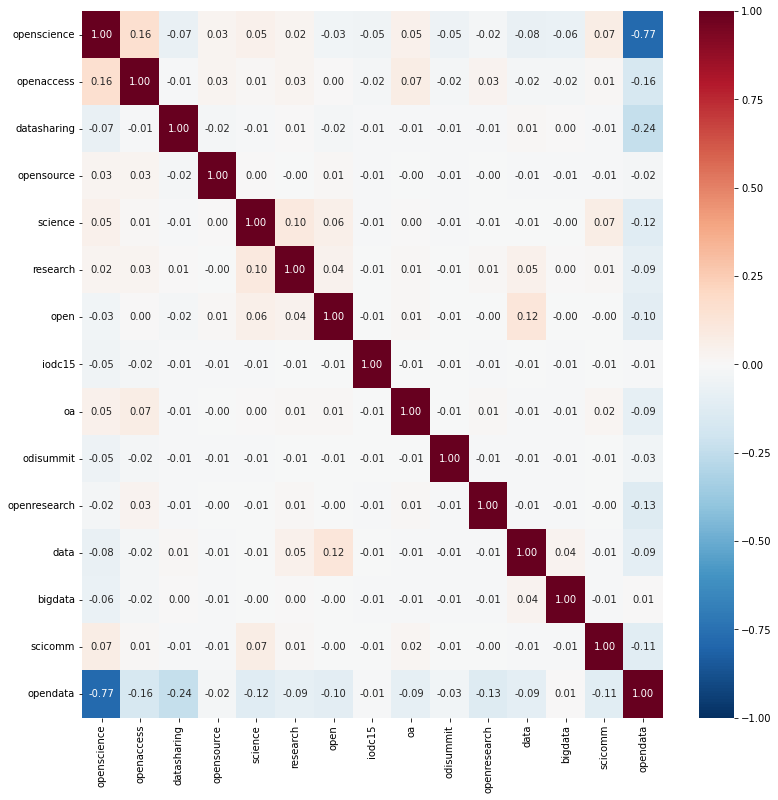

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
correlations = hashtag_matrix.corr()
fig = plt.figure(figsize=(13,13))
sns.heatmap(correlations,
    cmap='RdBu_r',
    annot=True,
    fmt='.2f',
    vmin=-1,
    vmax=1)
plt.show()
fig.savefig('correlation.png')
files.download('correlation.png')

---

## 5. **SENTIMENT ANALYSIS**

In [ ]:
sia = SentimentIntensityAnalyzer()

In [ ]:
data_merge['polarity'] = data_merge['text_clean'].progress_apply(lambda x: sia.polarity_scores(x)['compound'])

  0%|          | 0/226273 [00:00<?, ?it/s]

In [ ]:
conditions = [
    (data_merge['hashtags'].str.contains('opendata')),
    (data_merge['hashtags'].str.contains('datasharing')),
    (data_merge['hashtags'].str.contains('openscience')),
    (data_merge['hashtags'].str.contains('openresearch')),
    (data_merge['hashtags'].str.len() == 0)]
choices = ['#opendata', '#datasharing', '#openscience', '#openresearch', 'none']
data_merge['4_hashtags'] = np.select(conditions, choices, default='others')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

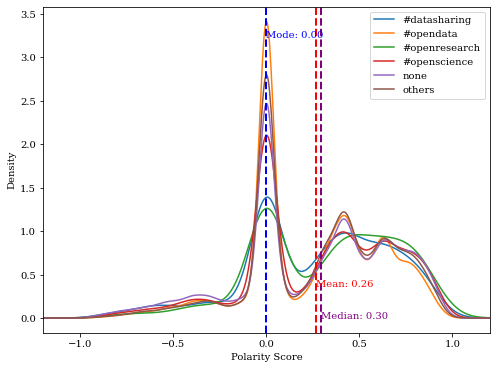

In [ ]:
fig = plt.figure(figsize=(8,6))
plt.rcParams['font.family'] = 'serif' # Font of text
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
data_merge.groupby(by='4_hashtags').polarity.plot(legend=True, kind='kde', xlim = ([-1.2, 1.2]))
plt.xlabel("Polarity Score")
plt.axvline(statistics.mode(data_merge.polarity), color='blue', linestyle='dashed', linewidth=2)
plt.axvline(data_merge.polarity.mean(), color='red', linestyle='dashed', linewidth=2)
plt.axvline(np.median(data_merge.polarity), color='purple', linestyle='dashed', linewidth=2)
min_ylim, max_ylim = plt.ylim()
plt.text(statistics.mode(data_merge.polarity), max_ylim*0.9, 'Mode: {:.2f}'.format(statistics.mode(data_merge.polarity)), color='blue')
plt.text(data_merge.polarity.mean(), max_ylim*0.1, 'Mean: {:.2f}'.format(data_merge.polarity.mean()), color='red')
plt.text(np.median(data_merge.polarity), max_ylim*0.0, 'Median: {:.2f}'.format(np.median(data_merge.polarity)), color='purple')
fig.savefig('polarity.png')
files.download('polarity.png')

### 5.1 Sentiment Analysis - Pre-Post Covid19 era

In [ ]:
data_pre_covid['polarity'] = data_pre_covid['text_clean'].progress_apply(lambda x: sia.polarity_scores(x)['compound'])
data_post_covid['polarity'] = data_post_covid['text_clean'].progress_apply(lambda x: sia.polarity_scores(x)['compound'])

  0%|          | 0/36961 [00:00<?, ?it/s]

  0%|          | 0/35742 [00:00<?, ?it/s]

In [ ]:
conditions = [
    (data_pre_covid['hashtags'].str.contains('opendata')),
    (data_pre_covid['hashtags'].str.contains('datasharing')),
    (data_pre_covid['hashtags'].str.contains('openscience')),
    (data_pre_covid['hashtags'].str.contains('openresearch')),
    (data_pre_covid['hashtags'].str.len() == 0)]
choices = ['#opendata', '#datasharing', '#openscience', '#openresearch', 'none']
data_pre_covid['4_hashtags'] = np.select(conditions, choices, default='others')

conditions = [
    (data_post_covid['hashtags'].str.contains('opendata')),
    (data_post_covid['hashtags'].str.contains('datasharing')),
    (data_post_covid['hashtags'].str.contains('openscience')),
    (data_post_covid['hashtags'].str.contains('openresearch')),
    (data_post_covid['hashtags'].str.len() == 0)]
choices = ['#opendata', '#datasharing', '#openscience', '#openresearch', 'none']
data_post_covid['4_hashtags'] = np.select(conditions, choices, default='others')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

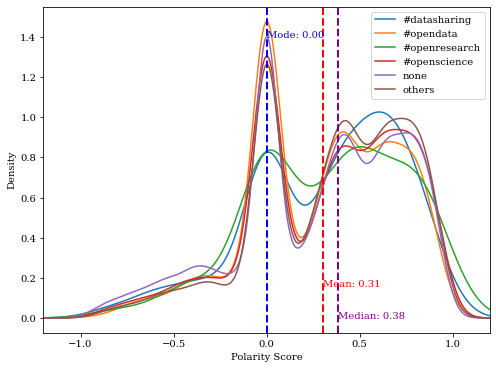

In [ ]:
fig = plt.figure(figsize=(8,6))
plt.rcParams['font.family'] = 'serif' # Font of text
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
data_pre_covid.groupby(by='4_hashtags').polarity.plot(legend=True, kind='kde', xlim = ([-1.2, 1.2]))
plt.xlabel("Polarity Score")
plt.axvline(statistics.mode(data_pre_covid.polarity), color='blue', linestyle='dashed', linewidth=2)
plt.axvline(data_pre_covid.polarity.mean(), color='red', linestyle='dashed', linewidth=2)
plt.axvline(np.median(data_pre_covid.polarity), color='purple', linestyle='dashed', linewidth=2)
min_ylim, max_ylim = plt.ylim()
plt.text(statistics.mode(data_pre_covid.polarity), max_ylim*0.9, 'Mode: {:.2f}'.format(statistics.mode(data_pre_covid.polarity)), color='blue')
plt.text(data_pre_covid.polarity.mean(), max_ylim*0.1, 'Mean: {:.2f}'.format(data_pre_covid.polarity.mean()), color='red')
plt.text(np.median(data_pre_covid.polarity), max_ylim*0.0, 'Median: {:.2f}'.format(np.median(data_pre_covid.polarity)), color='purple')
fig.savefig('polarity_pre.png')
files.download('polarity_pre.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

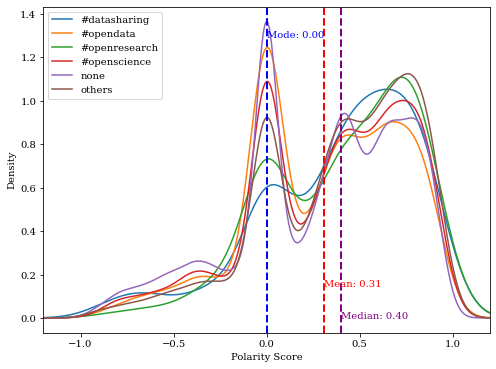

In [ ]:
fig = plt.figure(figsize=(8,6))
plt.rcParams['font.family'] = 'serif' # Font of text
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
data_post_covid.groupby(by='4_hashtags').polarity.plot(legend=True, kind='kde', xlim = ([-1.2, 1.2]))
plt.xlabel("Polarity Score")
plt.axvline(statistics.mode(data_post_covid.polarity), color='blue', linestyle='dashed', linewidth=2)
plt.axvline(data_post_covid.polarity.mean(), color='red', linestyle='dashed', linewidth=2)
plt.axvline(np.median(data_post_covid.polarity), color='purple', linestyle='dashed', linewidth=2)
min_ylim, max_ylim = plt.ylim()
plt.text(statistics.mode(data_post_covid.polarity), max_ylim*0.9, 'Mode: {:.2f}'.format(statistics.mode(data_post_covid.polarity)), color='blue')
plt.text(data_post_covid.polarity.mean(), max_ylim*0.1, 'Mean: {:.2f}'.format(data_post_covid.polarity.mean()), color='red')
plt.text(np.median(data_post_covid.polarity), max_ylim*0.0, 'Median: {:.2f}'.format(np.median(data_post_covid.polarity)), color='purple')
fig.savefig('polarity_post.png')
files.download('polarity_post.png')

---

## 6. **TOPIC MODELING**

We employ LDA function by Gensim.

We use cleaned and lemmatized text without "top terms".

Gensim method

In [ ]:
# Dictionary
id2word = corpora.Dictionary([d.split() for d in data_merge['text_clean_notop']])
# Corpus
texts = [d.split() for d in data_merge['text_clean_notop']]
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

In [ ]:
num_topics = 10
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus, id2word=id2word, num_topics=num_topics)
# Print the Keyword in the 10 topics
doc_lda = lda_model[corpus]

In [ ]:
df_lda = pd.DataFrame()
for topic_n, list_terms_w in lda_model.show_topics(formatted=False):
    df_tmp = pd.DataFrame(list_terms_w, columns=["Topic " + str(topic_n) + " word", "Topic " + str(topic_n) + " weight"])
    df_lda = pd.concat([df_lda, df_tmp], axis=1)

In [ ]:
df_lda

,Topic 0 word,Topic 0 weight,Topic 1 word,Topic 1 weight,Topic 2 word,Topic 2 weight,Topic 3 word,Topic 3 weight,Topic 4 word,Topic 4 weight,Topic 5 word,Topic 5 weight,Topic 6 word,Topic 6 weight,Topic 7 word,Topic 7 weight,Topic 8 word,Topic 8 weight,Topic 9 word,Topic 9 weight
0,study,0.025806,people,0.016362,read,0.020339,like,0.033400,public,0.038788,review,0.023822,problem,0.020658,talk,0.029193,platform,0.027131,access,0.030376
1,available,0.017193,think,0.015576,paper,0.016103,work,0.021186,tell,0.015798,look,0.014237,privacy,0.014674,day,0.025932,opt,0.021678,share,0.023852
2,case,0.016018,know,0.013960,hope,0.016011,good,0.021030,social,0.015499,peer,0.013557,big,0.012424,student,0.017819,lead,0.013691,need,0.015643
3,field,0.014402,share,0.013913,write,0.015561,want,0.019781,private,0.013473,require,0.013026,use,0.011660,author,0.016629,initiative,0.012470,practice,0.014576
4,free,0.013505,year,0.012324,post,0.014660,know,0.019315,health,0.012276,don,0.012895,share,0.011645,nhs,0.015534,movement,0.012290,datashare,0.013459
5,portal,0.013468,question,0.011932,try,0.013835,people,0.017428,need,0.010079,journal,0.012618,issue,0.011202,academic,0.014321,new,0.011452,agreement,0.011992
6,software,0.012366,good,0.011481,article,0.011812,idea,0.016279,education,0.009856,publication,0.011945,datashare,0.011012,great,0.014153,community,0.008685,system,0.009289
7,test,0.010772,add,0.010230,vaccine,0.011795,great,0.015072,communication,0.009238,like,0.009785,need,0.010194,yes,0.013132,world,0.008054,model,0.009220
8,source,0.009728,example,0.010133,bit,0.010950,share,0.012082,media,0.009190,need,0.009677,solution,0.009725,lab,0.011240,replication,0.007997,important,0.008617
9,project,0.009618,need,0.009548,like,0.009605,think,0.011857,response,0.008719,researcher,0.009371,way,0.009509,school,0.010233,take,0.007736,good,0.008505


In [ ]:
df_lda['Topic 0 weight'] = df_lda['Topic 0 weight'].astype(float)
df_lda['Topic 1 weight'] = df_lda['Topic 1 weight'].astype(float)
df_lda['Topic 2 weight'] = df_lda['Topic 2 weight'].astype(float)
df_lda['Topic 3 weight'] = df_lda['Topic 3 weight'].astype(float)
df_lda['Topic 4 weight'] = df_lda['Topic 4 weight'].astype(float)

In [ ]:
fig = go.Figure()

fig.add_trace(go.Bar(
    y=df_lda['Topic 0 weight'],
    x=df_lda['Topic 0 word'],
    marker_color='steelblue',
    name='Topic 0'

))
fig.add_trace(go.Bar(
    y=df_lda['Topic 1 weight'],
    x=df_lda['Topic 1 word'],
    marker_color='tan',
    name='Topic 1'

))
fig.add_trace(go.Bar(
    y=df_lda['Topic 2 weight'],
    x=df_lda['Topic 2 word'],
    marker_color='grey',
    name='Topic 2'

))
fig.add_trace(go.Bar(
    y=df_lda['Topic 3 weight'],
    x=df_lda['Topic 3 word'],
    marker_color='orchid',
    name='Topic 3'
    
))
fig.add_trace(go.Bar(
    y=df_lda['Topic 4 weight'],
    x=df_lda['Topic 4 word'],
    marker_color='lightseagreen',
    name='Topic 4'
    
))


fig.update_layout(barmode='group', xaxis_tickangle=-45, title='Topics',
                   yaxis_title='Weights', xaxis_title='Terms')
fig.show()

In [ ]:
perplexity = lda_model.log_perplexity(corpus)

In [ ]:
print('Perplexity:', perplexity)

Perplexity: -9.416985004410664


## 6.1 Topic modeling - Pre-Post Covid19 era

Pre Covid data topic modeling

In [ ]:
# Dictionary
id2word_pre = corpora.Dictionary([d.split() for d in data_pre_covid['text_clean_notop']])
# Corpus
texts_pre = [d.split() for d in data_pre_covid['text_clean_notop']]
# Term Document Frequency
corpus_pre = [id2word_pre.doc2bow(text) for text in texts_pre]

In [ ]:
num_topics = 10
# Build LDA model
lda_model_pre = gensim.models.LdaMulticore(corpus=corpus_pre, id2word=id2word_pre, num_topics=num_topics)
# Print the Keyword in the 10 topics
doc_lda_pre = lda_model_pre[corpus_pre]

In [ ]:
df_lda_pre = pd.DataFrame()
for topic_n, list_terms_w in lda_model_pre.show_topics(formatted=False):
    df_tmp_pre = pd.DataFrame(list_terms_w, columns=["Topic " + str(topic_n) + " word", "Topic " + str(topic_n) + " weight"])
    df_lda_pre = pd.concat([df_lda_pre, df_tmp_pre], axis=1)

In [ ]:
df_lda_pre

,Topic 0 word,Topic 0 weight,Topic 1 word,Topic 1 weight,Topic 2 word,Topic 2 weight,Topic 3 word,Topic 3 weight,Topic 4 word,Topic 4 weight,Topic 5 word,Topic 5 weight,Topic 6 word,Topic 6 weight,Topic 7 word,Topic 7 weight,Topic 8 word,Topic 8 weight,Topic 9 word,Topic 9 weight
0,year,0.017818,like,0.013895,access,0.017887,share,0.012787,share,0.012200,datashare,0.016606,people,0.017202,great,0.022442,good,0.018649,look,0.013062
1,talk,0.012234,share,0.011962,review,0.015865,work,0.010677,use,0.008233,need,0.012943,work,0.011026,like,0.013520,thing,0.010302,think,0.012773
2,share,0.008125,come,0.009572,publish,0.013020,need,0.008595,need,0.008158,share,0.010636,public,0.010325,number,0.008841,mean,0.010068,work,0.010699
3,work,0.007741,work,0.008634,paper,0.012537,good,0.007974,work,0.007338,system,0.008750,want,0.009719,plan,0.008255,people,0.009998,like,0.010191
4,life,0.007513,know,0.008480,journal,0.012334,available,0.007023,big,0.006815,privacy,0.007938,share,0.009195,list,0.005976,share,0.008867,question,0.008093
5,health,0.007178,thing,0.007791,time,0.009397,include,0.006645,datashare,0.006687,agreement,0.007442,way,0.008846,work,0.005881,find,0.007429,new,0.007663
6,access,0.006480,use,0.007626,need,0.009350,like,0.006540,project,0.006135,company,0.006903,know,0.008641,use,0.005857,think,0.007373,forward,0.007243
7,need,0.006279,need,0.006768,peer,0.007998,researcher,0.006335,challenge,0.006020,well,0.006750,think,0.008269,good,0.005736,right,0.007299,talk,0.006974
8,change,0.006188,people,0.006162,publication,0.007541,practice,0.006334,issue,0.005080,think,0.005987,need,0.008008,management,0.005226,work,0.007233,good,0.006530
9,future,0.006066,good,0.006116,pay,0.007065,yes,0.005087,important,0.004847,cost,0.005943,like,0.007791,idea,0.004629,use,0.006640,know,0.006380


In [ ]:
df_lda_pre['Topic 0 weight'] = df_lda_pre['Topic 0 weight'].astype(float)
df_lda_pre['Topic 1 weight'] = df_lda_pre['Topic 1 weight'].astype(float)
df_lda_pre['Topic 2 weight'] = df_lda_pre['Topic 2 weight'].astype(float)
df_lda_pre['Topic 3 weight'] = df_lda_pre['Topic 3 weight'].astype(float)
df_lda_pre['Topic 4 weight'] = df_lda_pre['Topic 4 weight'].astype(float)

In [ ]:
fig = go.Figure()

fig.add_trace(go.Bar(
    y=df_lda_pre['Topic 0 weight'],
    x=df_lda_pre['Topic 0 word'],
    marker_color='steelblue',
    name='Topic 0'

))
fig.add_trace(go.Bar(
    y=df_lda_pre['Topic 1 weight'],
    x=df_lda_pre['Topic 1 word'],
    marker_color='tan',
    name='Topic 1'

))
fig.add_trace(go.Bar(
    y=df_lda_pre['Topic 2 weight'],
    x=df_lda_pre['Topic 2 word'],
    marker_color='grey',
    name='Topic 2'

))
fig.add_trace(go.Bar(
    y=df_lda_pre['Topic 3 weight'],
    x=df_lda_pre['Topic 3 word'],
    marker_color='orchid',
    name='Topic 3'
    
))
fig.add_trace(go.Bar(
    y=df_lda_pre['Topic 4 weight'],
    x=df_lda_pre['Topic 4 word'],
    marker_color='lightseagreen',
    name='Topic 4'
    
))


fig.update_layout(barmode='group', xaxis_tickangle=-45, title='Topics Pre-Covid19 era',
                   yaxis_title='Weights', xaxis_title='Terms')
fig.show()

In [ ]:
perplexity_pre = lda_model_pre.log_perplexity(corpus_pre)

In [ ]:
print('Perplexity:', perplexity_pre)

Perplexity: -9.10630741056521


Post Covid data topic modeling

In [ ]:
# Dictionary
id2word_post = corpora.Dictionary([d.split() for d in data_post_covid['text_clean_notop']])
# Corpus
texts_post = [d.split() for d in data_post_covid['text_clean_notop']]
# Term Document Frequency
corpus_post = [id2word_post.doc2bow(text) for text in texts_post]

In [ ]:
num_topics = 10
# Build LDA model
lda_model_post = gensim.models.LdaMulticore(corpus=corpus_post, id2word=id2word_post, num_topics=num_topics)
# Print the Keyword in the 10 topics
doc_lda_post = lda_model_post[corpus_post]

In [ ]:
df_lda_post = pd.DataFrame()
for topic_n, list_terms_w in lda_model_post.show_topics(formatted=False):
    df_tmp_post = pd.DataFrame(list_terms_w, columns=["Topic " + str(topic_n) + " word", "Topic " + str(topic_n) + " weight"])
    df_lda_post = pd.concat([df_lda_post, df_tmp_post], axis=1)

In [ ]:
df_lda_post

,Topic 0 word,Topic 0 weight,Topic 1 word,Topic 1 weight,Topic 2 word,Topic 2 weight,Topic 3 word,Topic 3 weight,Topic 4 word,Topic 4 weight,Topic 5 word,Topic 5 weight,Topic 6 word,Topic 6 weight,Topic 7 word,Topic 7 weight,Topic 8 word,Topic 8 weight,Topic 9 word,Topic 9 weight
0,work,0.011875,need,0.011414,paper,0.015839,like,0.014042,share,0.012721,share,0.011321,community,0.009572,access,0.011324,good,0.020677,share,0.023104
1,datashare,0.008512,question,0.011012,journal,0.012306,people,0.010715,datashare,0.012234,like,0.010528,new,0.006893,work,0.009573,think,0.013967,datashare,0.012835
2,share,0.007884,great,0.010383,article,0.009072,work,0.010444,health,0.010344,need,0.010412,people,0.006442,publish,0.008864,work,0.007288,use,0.009923
3,need,0.007549,talk,0.010269,like,0.009044,think,0.010111,love,0.007092,work,0.009148,year,0.006156,support,0.008630,share,0.007050,need,0.009550
4,look,0.006845,work,0.008693,publish,0.007608,know,0.009647,vaccine,0.006816,datashare,0.006868,like,0.006080,need,0.007889,year,0.006890,people,0.008706
5,platform,0.006550,important,0.007088,review,0.007512,datashare,0.008465,case,0.006595,new,0.006486,use,0.005961,available,0.007852,use,0.006381,think,0.008115
6,new,0.006251,well,0.006172,access,0.007174,thing,0.008403,covid,0.006117,time,0.005387,world,0.005914,change,0.007511,like,0.006026,problem,0.007788
7,lot,0.006195,public,0.006141,work,0.006404,want,0.006419,study,0.006016,process,0.005187,portal,0.005439,practice,0.006605,system,0.005730,review,0.006951
8,time,0.006189,thing,0.006113,idea,0.006388,way,0.005970,report,0.005883,good,0.005173,great,0.005321,public,0.006135,need,0.005706,way,0.006826
9,great,0.005573,scientist,0.005115,need,0.006088,share,0.005755,system,0.005578,public,0.005050,work,0.005261,good,0.005763,look,0.005092,yes,0.006739


In [ ]:
df_lda_post['Topic 0 weight'] = df_lda_post['Topic 0 weight'].astype(float)
df_lda_post['Topic 1 weight'] = df_lda_post['Topic 1 weight'].astype(float)
df_lda_post['Topic 2 weight'] = df_lda_post['Topic 2 weight'].astype(float)
df_lda_post['Topic 3 weight'] = df_lda_post['Topic 3 weight'].astype(float)
df_lda_post['Topic 4 weight'] = df_lda_post['Topic 4 weight'].astype(float)

In [ ]:
fig = go.Figure()

fig.add_trace(go.Bar(
    y=df_lda_post['Topic 0 weight'],
    x=df_lda_post['Topic 0 word'],
    marker_color='steelblue',
    name='Topic 0'

))
fig.add_trace(go.Bar(
    y=df_lda_post['Topic 1 weight'],
    x=df_lda_post['Topic 1 word'],
    marker_color='tan',
    name='Topic 1'

))
fig.add_trace(go.Bar(
    y=df_lda_post['Topic 2 weight'],
    x=df_lda_post['Topic 2 word'],
    marker_color='grey',
    name='Topic 2'

))
fig.add_trace(go.Bar(
    y=df_lda_post['Topic 3 weight'],
    x=df_lda_post['Topic 3 word'],
    marker_color='orchid',
    name='Topic 3'
    
))
fig.add_trace(go.Bar(
    y=df_lda_post['Topic 4 weight'],
    x=df_lda_post['Topic 4 word'],
    marker_color='lightseagreen',
    name='Topic 4'
    
))


fig.update_layout(barmode='group', xaxis_tickangle=-45, title='Topics Post-Covid19 era',
                   yaxis_title='Weights', xaxis_title='Terms')
fig.show()

In [ ]:
perplexity_post = lda_model_post.log_perplexity(corpus_post)

In [ ]:
print('Perplexity:', perplexity_post)

Perplexity: -9.09940934786288
